# Exploring search results

After finishing a pipeline search, we can inspect the results. First, let's build a search of 10 different pipelines to explore.

In [1]:
import evalml

X, y = evalml.demos.load_breast_cancer()

clf = evalml.AutoClassifier(objective="f1",
                            max_pipelines=10)

clf.fit(X, y)

*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. Greater score is better.

Searching up to 10 pipelines. No time limit is set. Set one using max_time parameter.

Possible model types: linear_model, random_forest, xgboost

✔ XGBoost w/ imputation:                     0%|          | Elapsed:00:00
✔ XGBoost w/ imputation:                    10%|█         | Elapsed:00:00
✔ Random Forest w/ imputation:              20%|██        | Elapsed:00:06
✔ XGBoost w/ imputation:                    30%|███       | Elapsed:00:06
✔ LogisticRegression w/ imputation + ...    40%|████      | Elapsed:00:10
✔ XGBoost w/ imputation:                    50%|█████     | Elapsed:00:10
✔ LogisticRegression w/ imputation + ...    60%|██████    | Elapsed:00:14
✔ XGBoost w/ imputation:                    70%|███████   | Elapsed:00:14
✔ LogisticRegression w/ imputation + ...    80%|████████  | Elapsed:00:18
✔ LogisticRegression w/ imputation + ...    90%|███

## View Rankings
A summary of all the pipelines built can be returned as a dataframe. It is sorted by score. EvalML knows based on your objective function whether or not high or lower is better.

In [2]:
clf.rankings

,id,pipeline_name,score,high_variance_cv,parameters
0,8,LogisticRegressionPipeline,0.980527,False,"{'penalty': 'l2', 'C': 0.5765626434012575, 'im..."
1,6,LogisticRegressionPipeline,0.974853,False,"{'penalty': 'l2', 'C': 6.239401330891865, 'imp..."
2,9,LogisticRegressionPipeline,0.974853,False,"{'penalty': 'l2', 'C': 8.123565600467177, 'imp..."
3,4,LogisticRegressionPipeline,0.973411,False,"{'penalty': 'l2', 'C': 8.444214828324364, 'imp..."
4,1,XGBoostPipeline,0.970674,False,"{'eta': 0.38438170729269994, 'min_child_weight..."
5,5,XGBoostPipeline,0.969254,False,"{'eta': 0.6481718720511973, 'min_child_weight'..."
6,2,RFClassificationPipeline,0.966846,False,"{'n_estimators': 569, 'max_depth': 22, 'impute..."
7,0,XGBoostPipeline,0.965195,False,"{'eta': 0.5928446182250184, 'min_child_weight'..."
8,7,XGBoostPipeline,0.965195,False,"{'eta': 0.9786183422327642, 'min_child_weight'..."
9,3,XGBoostPipeline,0.960739,False,"{'eta': 0.5288949197529046, 'min_child_weight'..."


## Describe Pipeline
Each pipeline is given an `id`. We can get more information about any particular pipeline using that id

In [3]:
clf.describe_pipeline(0)

************************
* Pipeline Description *
************************

Pipeline Name: XGBoost w/ imputation
Model type: ModelTypes.XGBOOST
Objective: F1 (greater is better)
Total training time (including CV): 0.2 seconds

Parameters
• eta: 0.5928446182250184
• min_child_weight: 8.598391737229157
• max_depth: 4
• impute_strategy: most_frequent
• percent_features: 0.6273280598181127

Cross Validation
               F1  Precision  Recall   AUC  Log Loss   MCC # Training # Testing
0           0.959      0.943   0.959 0.987     0.150 0.887    379.000   190.000
1           0.975      0.959   0.975 0.996     0.106 0.933    379.000   190.000
2           0.962      0.974   0.962 0.983     0.134 0.899    380.000   189.000
mean        0.965      0.959   0.965 0.988     0.130 0.906          -         -
std         0.009      0.016   0.009 0.006     0.022 0.024          -         -
coef of var 0.009      0.016   0.009 0.007     0.172 0.026          -         -


## Get Pipeline
You can get the object for any pipeline as well

In [4]:
clf.get_pipeline(0)

### Get best pipeline
If you specifically want to get the best pipeline, there is a convenient access. 

In [5]:
clf.best_pipeline

## Feature Importances

We can get the feature importances of the resulting pipeline

In [6]:
pipeline = clf.get_pipeline(0)
pipeline.feature_importances

,feature,importance
0,22,0.371201
1,27,0.153827
2,7,0.145848
3,20,0.087861
4,23,0.052571
5,26,0.044619
6,6,0.036699
7,13,0.032339
8,1,0.026583
9,24,0.026560


We can also plot the feature importances as well.

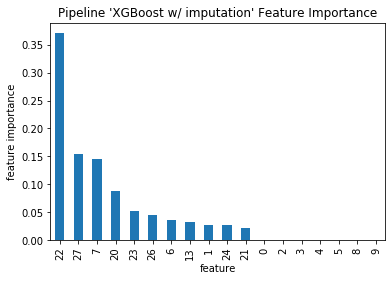

In [7]:
pipeline.plot_feature_importance()

## Access raw results
You can also get access to all the underlying data like this

In [8]:
clf.results

{0: {'id': 0,
  'pipeline_name': 'XGBoostPipeline',
  'parameters': {'eta': 0.5928446182250184,
   'min_child_weight': 8.598391737229157,
   'max_depth': 4,
   'impute_strategy': 'most_frequent',
   'percent_features': 0.6273280598181127},
  'score': 0.9651954750600785,
  'high_variance_cv': False,
  'scores': [0.9586776859504134, 0.9752066115702479, 0.9617021276595743],
  'all_objective_scores': [OrderedDict([('F1', 0.9586776859504134),
                ('Precision', 0.943089430894309),
                ('Recall', 0.9586776859504134),
                ('AUC', 0.9865664575689431),
                ('Log Loss', 0.14983175628279385),
                ('MCC', 0.8871869342405617),
                ('# Training', 379),
                ('# Testing', 190)]),
   OrderedDict([('F1', 0.9752066115702479),
                ('Precision', 0.959349593495935),
                ('Recall', 0.9752066115702479),
                ('AUC', 0.9955616049236596),
                ('Log Loss', 0.10579590414111552),
      